In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


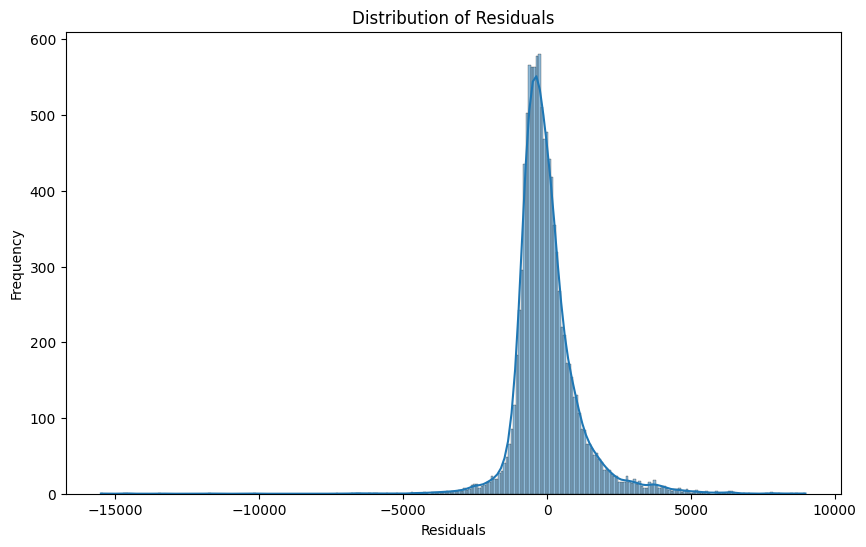

In [2]:
#1
def visualize_residuals_diamonds():
    diamonds = sns.load_dataset("diamonds")
    diamonds = pd.get_dummies(diamonds, drop_first=True)
    target = "price"
    features = [col for col in diamonds.columns if col != target]

    X = diamonds[features]
    y = diamonds[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    residuals = y_test - predictions
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title("Distribution of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

if __name__ == "__main__":
    visualize_residuals_diamonds()

In [3]:
# 2
def calculate_regression_errors(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


if __name__ == "__main__":
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2, 4, 5, 4, 5])

    calculate_regression_errors(X, y)

Mean Squared Error (MSE): 0.7347
Mean Absolute Error (MAE): 0.8571
Root Mean Squared Error (RMSE): 0.8571


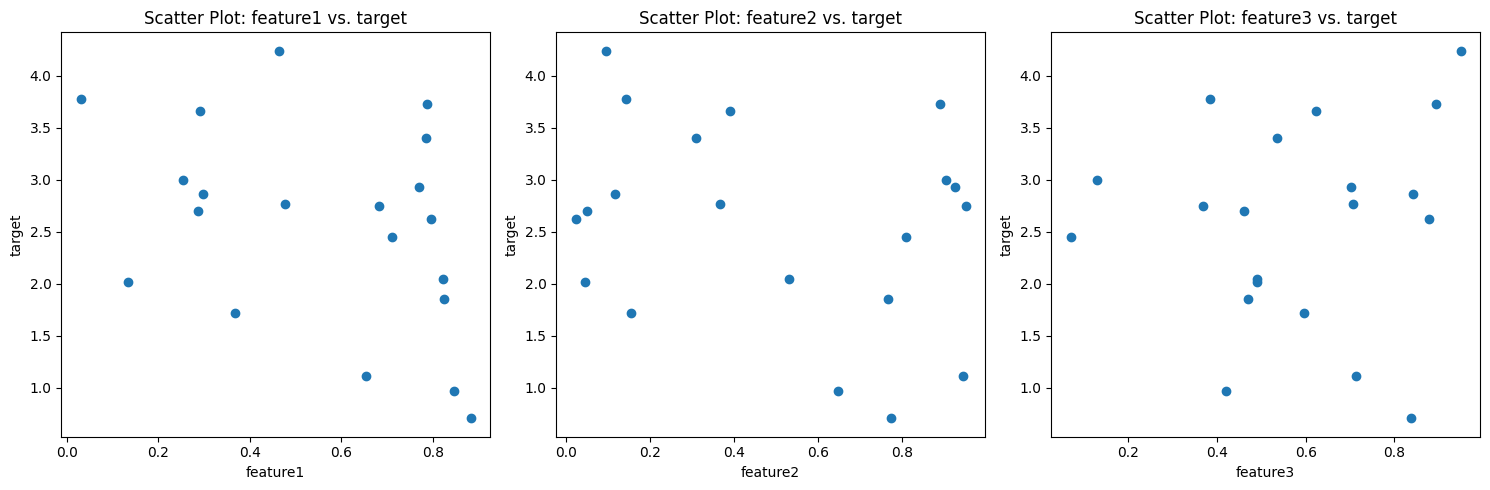

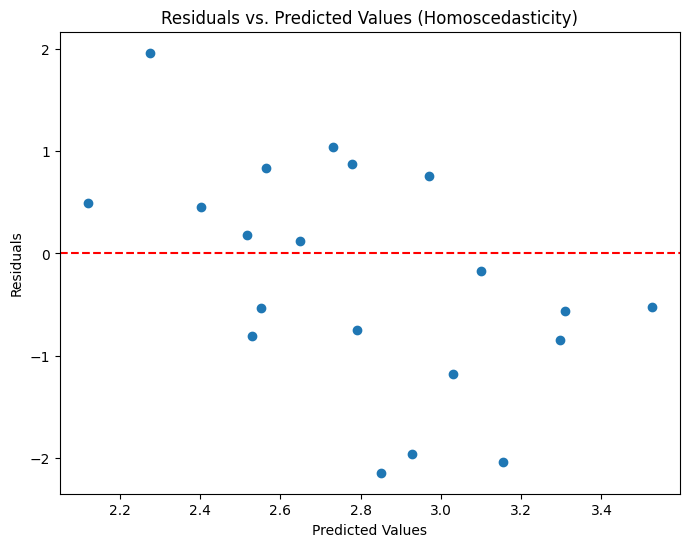

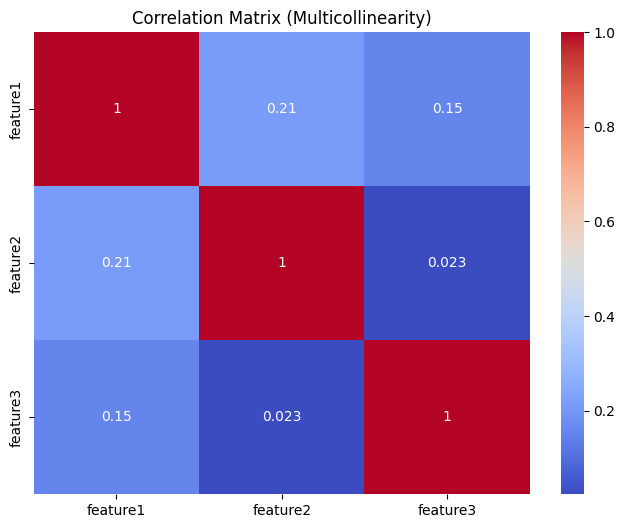

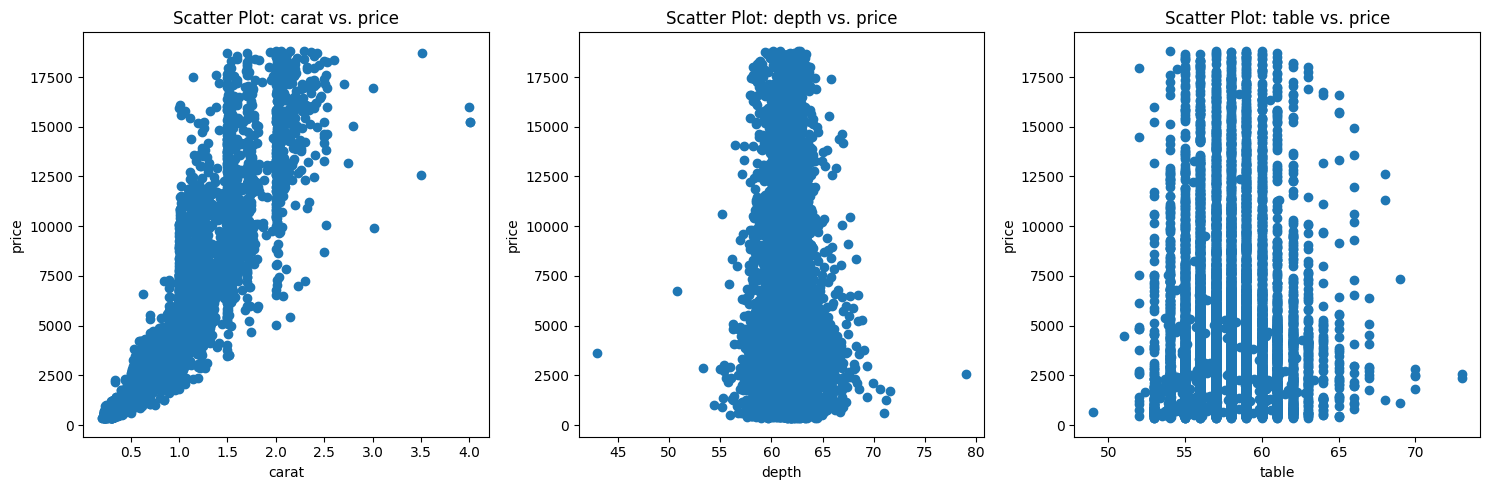

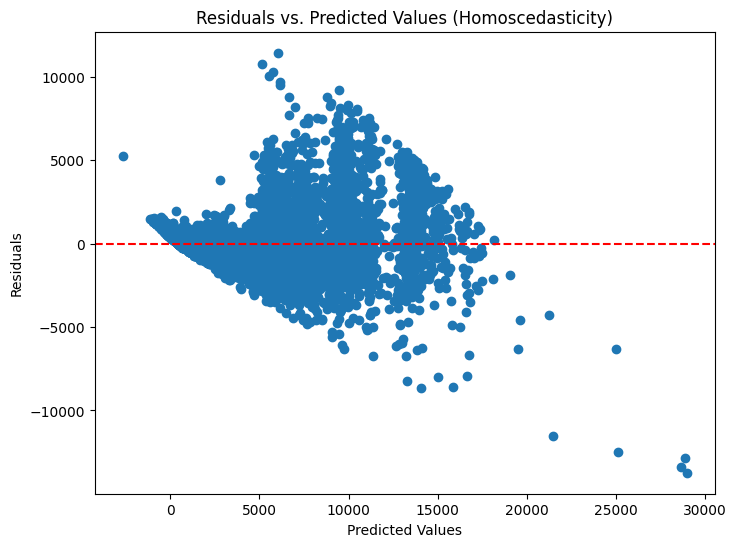

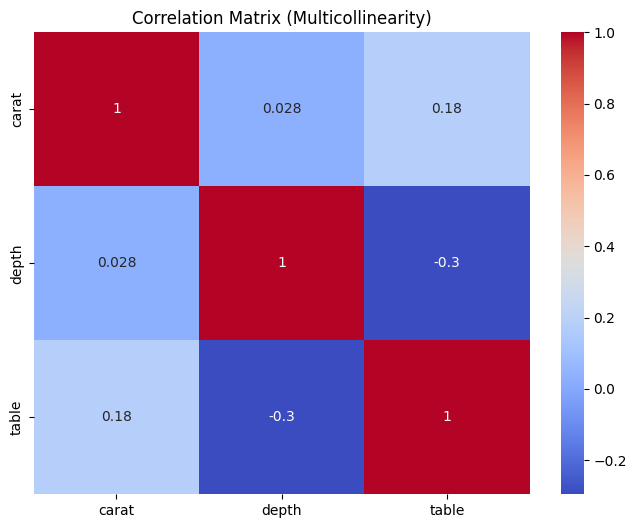

In [4]:
#3
def check_linear_regression_assumptions(df, target, features):

    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    residuals = y_test - predictions

    # 1. Linearity
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i + 1)
        plt.scatter(X_test[feature], y_test)
        plt.title(f"Scatter Plot: {feature} vs. {target}")
        plt.xlabel(feature)
        plt.ylabel(target)
    plt.tight_layout()
    plt.show()

    # 2. Homoscedasticity
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions, residuals)
    plt.title("Residuals vs. Predicted Values (Homoscedasticity)")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    # 3. Multicollinearity
    correlation_matrix = df[features].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix (Multicollinearity)")
    plt.show()

if __name__ == "__main__":
    data = {
        'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'feature3': np.random.rand(100),
        'target': 2 * np.random.rand(100) + 3 * np.random.rand(100) + np.random.rand(100) * 0.5 #creating a target correlated with features
    }
    df = pd.DataFrame(data)

    target = 'target'
    features = ['feature1', 'feature2', 'feature3']

    check_linear_regression_assumptions(df, target, features)
    diamonds = sns.load_dataset('diamonds')
    diamonds = pd.get_dummies(diamonds, drop_first=True)
    target = "price"
    features = [col for col in diamonds.columns if col != target]
    check_linear_regression_assumptions(diamonds, target, features[:3]) #limiting features to 3 to keep plots readable.

In [ ]:
#4
def evaluate_regression_models(df, target, features):


    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Linear Regression": Pipeline([
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ]),
        "Random Forest": Pipeline([
            ('scaler', StandardScaler()),
            ('model', RandomForestRegressor(random_state=42))
        ]),
        "Gradient Boosting": Pipeline([
            ('scaler', StandardScaler()),
            ('model', GradientBoostingRegressor(random_state=42))
        ]),
        "SVR": Pipeline([
            ('scaler', StandardScaler()),
            ('model', SVR())
        ])
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        results[name] = {"MSE": mse, "R2": r2}

    results_df = pd.DataFrame(results).T
    print(results_df)

if __name__ == "__main__":
    
    data = {
        'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'feature3': np.random.rand(100),
        'target': 2 * np.random.rand(100) + 3 * np.random.rand(100) + np.random.rand(100) * 0.5
    }
    df = pd.DataFrame(data)

    target = 'target'
    features = ['feature1', 'feature2', 'feature3']

    evaluate_regression_models(df, target, features)
    
    diamonds = sns.load_dataset('diamonds')
    diamonds = pd.get_dummies(diamonds, drop_first=True)
    target = "price"
    features = [col for col in diamonds.columns if col != target]

    evaluate_regression_models(diamonds, target, features)

                        MSE        R2
Linear Regression  0.849242  0.078699
Random Forest      0.895277  0.028759
Gradient Boosting  1.414473 -0.534492
SVR                1.080493 -0.172173


In [8]:
#5
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def simple_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.4f}")

if __name__ == "__main__":
    
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2, 4, 5, 4, 5]) 

    simple_linear_regression(X, y)
    import pandas as pd
    data = {'feature1': [1, 2, 3, 4, 5],
            'target': [2, 4, 5, 4, 5]}
    df = pd.DataFrame(data)
    X = df[['feature1']]
    y = df['target']
    simple_linear_regression(X,y)

Coefficients: [0.68571429]
Intercept: 1.7714285714285714
R-squared: nan
Coefficients: [0.68571429]
Intercept: 1.7714285714285714
R-squared: nan


C:\Users\Bodhisatwa Maharana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Bodhisatwa Maharana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def analyze_tips_relationship():
    tips = sns.load_dataset("tips")
    X = tips[['total_bill']]  
    y = tips['tip'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    print(f"Coefficients (slope): {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"R-squared: {r2_score(y_test, predictions):.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.7)  
    plt.plot(X_test, predictions, color='red', linewidth=2, label='Linear Regression') 
    plt.title("Relationship between Total Bill and Tip")
    plt.xlabel("Total Bill ($)")
    plt.ylabel("Tip ($)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    analyze_tips_relationship()

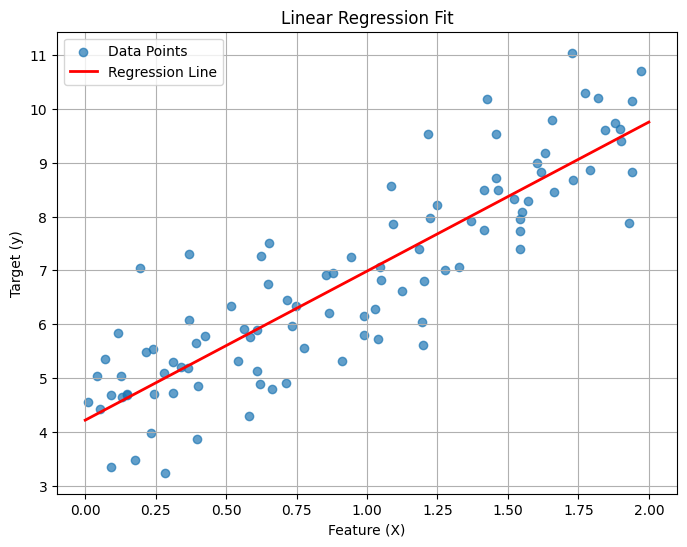

Coefficients (slope): 2.7701
Intercept: 4.2151


In [9]:
#7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def fit_and_predict_linear_regression(num_samples=100):

    np.random.seed(42) 
    X = 2 * np.random.rand(num_samples, 1) 
    y = 4 + 3 * X + np.random.randn(num_samples, 1) 
    model = LinearRegression()
    model.fit(X, y)
    X_new = np.array([[0], [2]]) 
    y_predict = model.predict(X_new)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Regression Line")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Coefficients (slope): {model.coef_[0][0]:.4f}")
    print(f"Intercept: {model.intercept_[0]:.4f}")

if __name__ == "__main__":
    fit_and_predict_linear_regression()

In [10]:
#8
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

def pickle_linear_regression_model(model, filename="linear_regression_model.pkl"):

    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

def train_and_pickle_model():
    """Trains a linear regression model and then pickles it."""
    # Generate some simple data
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2, 4, 5, 4, 5])

    model = LinearRegression()
    model.fit(X, y)

    pickle_linear_regression_model(model)

if __name__ == "__main__":
    train_and_pickle_model()

    with open('linear_regression_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    print(loaded_model.predict([[6]]))

Model saved to linear_regression_model.pkl
[5.8]


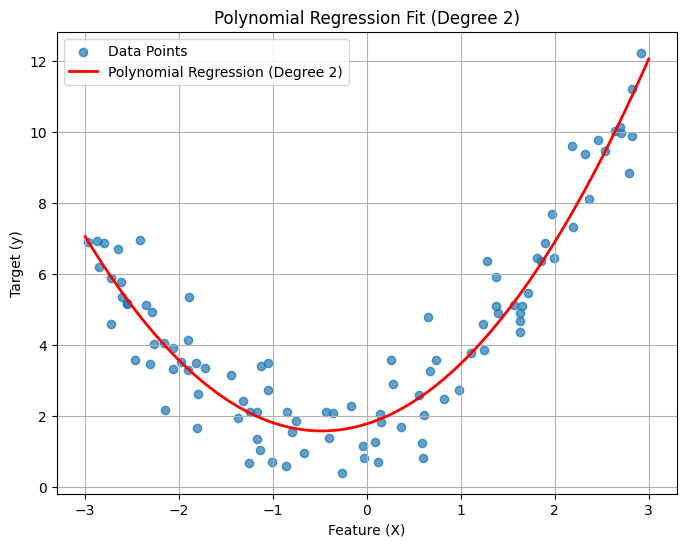

In [11]:
#9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def fit_and_plot_polynomial_regression(num_samples=100):
    np.random.seed(42)
    X = 6 * np.random.rand(num_samples, 1) - 3
    y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(num_samples, 1)
    
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X, y)

    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

  
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    plt.plot(X_plot, y_plot, "r-", linewidth=2, label="Polynomial Regression (Degree 2)")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Polynomial Regression Fit (Degree 2)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    fit_and_plot_polynomial_regression()

In [12]:
#10
import numpy as np
from sklearn.linear_model import LinearRegression

def generate_and_fit_linear_regression(num_samples=100):    
    np.random.seed(42)  
    X = 2 * np.random.rand(num_samples, 1) 
    y = 4 + 3 * X + np.random.randn(num_samples, 1)  
    model = LinearRegression()
    model.fit(X, y)
    print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
    print(f"Intercept: {model.intercept_[0]:.4f}")

if __name__ == "__main__":
    generate_and_fit_linear_regression()

Coefficient (slope): 2.7701
Intercept: 4.2151


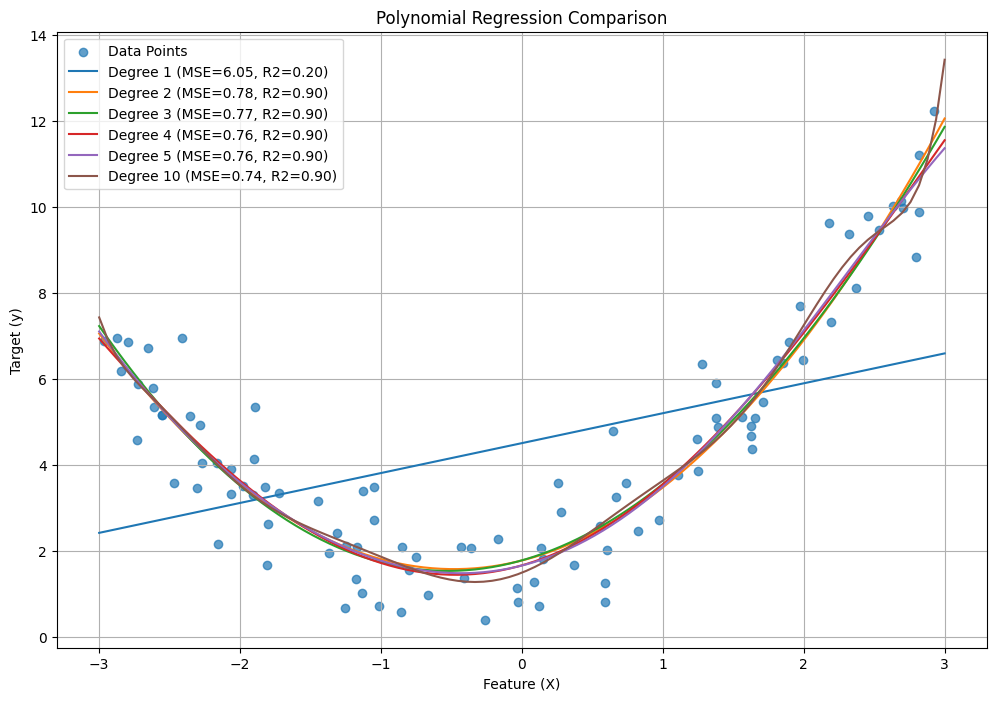

Performance Comparison:
Degree 1: MSE=6.0476, R2=0.2016
Degree 2: MSE=0.7772, R2=0.8974
Degree 3: MSE=0.7725, R2=0.8980
Degree 4: MSE=0.7635, R2=0.8992
Degree 5: MSE=0.7615, R2=0.8995
Degree 10: MSE=0.7399, R2=0.9023


In [13]:
#11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def compare_polynomial_regression_degrees(num_samples=100):
   
    np.random.seed(42)
    X = 6 * np.random.rand(num_samples, 1) - 3
    y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(num_samples, 1)

    degrees = [1, 2, 3, 4, 5, 10] 
    results = {}

    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, alpha=0.7, label="Data Points")

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)
        y_pred = model.predict(X)

        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        results[degree] = {"MSE": mse, "R2": r2}

        X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
        y_plot = model.predict(X_plot)
        plt.plot(X_plot, y_plot, label=f"Degree {degree} (MSE={mse:.2f}, R2={r2:.2f})")

    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Polynomial Regression Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Performance Comparison:")
    for degree, metrics in results.items():
        print(f"Degree {degree}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

if __name__ == "__main__":
    compare_polynomial_regression_degrees()

In [14]:
#12
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def multiple_linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    print(f"Coefficients (feature 1, feature 2): {model.coef_}")
    print(f"Intercept: {model.intercept_}")

    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.4f}")

if __name__ == "__main__":
   
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])  
    y = np.array([5, 8, 11, 14, 17])  
    multiple_linear_regression(X, y)


    data = {'feature1': [1, 2, 3, 4, 5],
            'feature2': [2, 3, 4, 5, 6],
            'target': [5, 8, 11, 14, 17]}
    df = pd.DataFrame(data)
    X = df[['feature1','feature2']]
    y = df['target']
    multiple_linear_regression(X,y)

Coefficients (feature 1, feature 2): [1.5 1.5]
Intercept: 0.5000000000000018
R-squared: nan
Coefficients (feature 1, feature 2): [1.5 1.5]
Intercept: 0.5000000000000018
R-squared: nan


C:\Users\Bodhisatwa Maharana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Bodhisatwa Maharana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


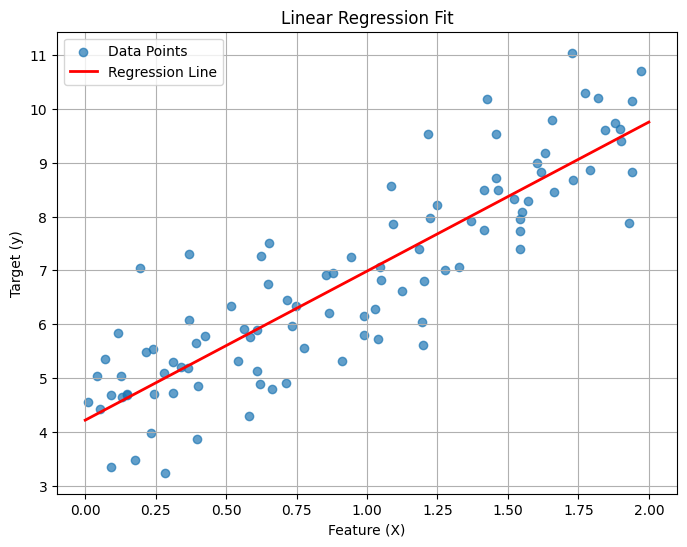

Coefficient (slope): 2.7701
Intercept: 4.2151


In [15]:
#13
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_fit_visualize_linear_regression(num_samples=100):

    np.random.seed(42)  
    X = 2 * np.random.rand(num_samples, 1)  
    y = 4 + 3 * X + np.random.randn(num_samples, 1)  


    model = LinearRegression()
    model.fit(X, y)

    X_plot = np.array([[0], [2]]) 
    y_predict = model.predict(X_plot)

   
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    plt.plot(X_plot, y_predict, "r-", linewidth=2, label="Regression Line")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
    print(f"Intercept: {model.intercept_[0]:.4f}")

if __name__ == "__main__":
    generate_fit_visualize_linear_regression()

In [16]:
#14
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
  
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]

    return vif_data

if __name__ == "__main__":
    data = {
        'feature1': np.random.rand(100),
        'feature2': np.random.rand(100) * 2 + 0.5 * np.random.rand(100),  # Correlated with feature1
        'feature3': np.random.rand(100) * 0.8 + 0.1 * np.random.rand(100),  # Correlated with feature 1 and 2 but less
        'feature4': np.random.rand(100) #Independent Feature
    }
    df = pd.DataFrame(data)

    features = ['feature1', 'feature2', 'feature3', 'feature4']

    vif_result = calculate_vif(df, features)
    print(vif_result)

    
    import seaborn as sns
    diamonds = sns.load_dataset('diamonds')
    diamonds = pd.get_dummies(diamonds, drop_first=True)
    target = "price"
    features = [col for col in diamonds.columns if col != target]

    if len(features) > 0: #guard against empty feature lists.
        vif_result = calculate_vif(diamonds, features[:10]) #using only the first 10, to avoid very large outputs.
        print(vif_result)

ModuleNotFoundError: No module named 'statsmodels'

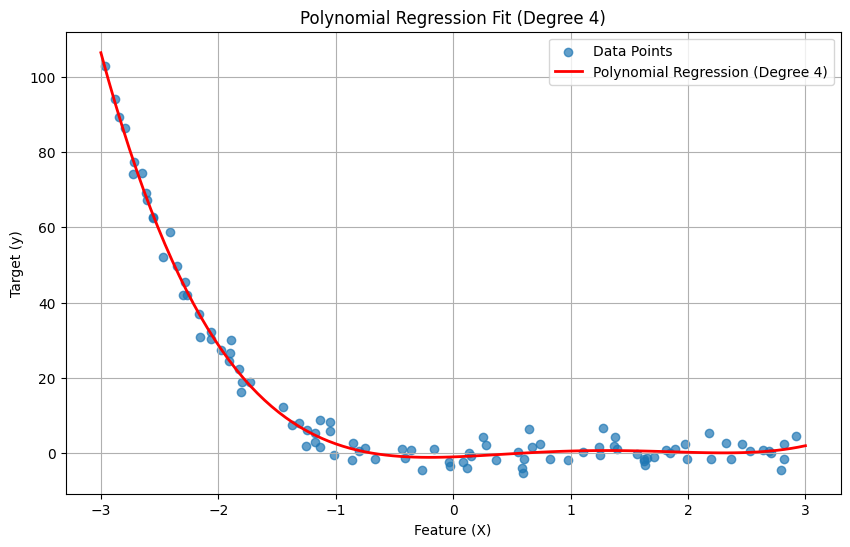

In [17]:
#15
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def generate_fit_plot_polynomial_degree4(num_samples=100):

    np.random.seed(42)  # For reproducibility
    X = 6 * np.random.rand(num_samples, 1) - 3  # Feature (X)
    y = 0.5 * X**4 - 2 * X**3 + 1.5 * X**2 + X + np.random.randn(num_samples, 1) * 3  # Target (y) with noise

    model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
    model.fit(X, y)

    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_predict = model.predict(X_plot)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    plt.plot(X_plot, y_predict, "r-", linewidth=2, label="Polynomial Regression (Degree 4)")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Polynomial Regression Fit (Degree 4)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    generate_fit_plot_polynomial_degree4()

In [18]:
#16
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def create_and_evaluate_pipeline(X, y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline = make_pipeline(StandardScaler(), LinearRegression())
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.4f}")


if __name__ == "__main__":
    # Create some example data
    X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]])  # Features
    y = np.array([5, 8, 11, 14, 17])  # Target

    create_and_evaluate_pipeline(X, y)


    data = {'feature1': [1, 2, 3, 4, 5],
            'feature2': [2, 3, 4, 5, 6],
            'feature3': [3, 4, 5, 6, 7],
            'target': [5, 8, 11, 14, 17]}
    df = pd.DataFrame(data)
    X = df[['feature1','feature2','feature3']]
    y = df['target']
    create_and_evaluate_pipeline(X,y)

R-squared: nan
R-squared: nan


C:\Users\Bodhisatwa Maharana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Bodhisatwa Maharana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


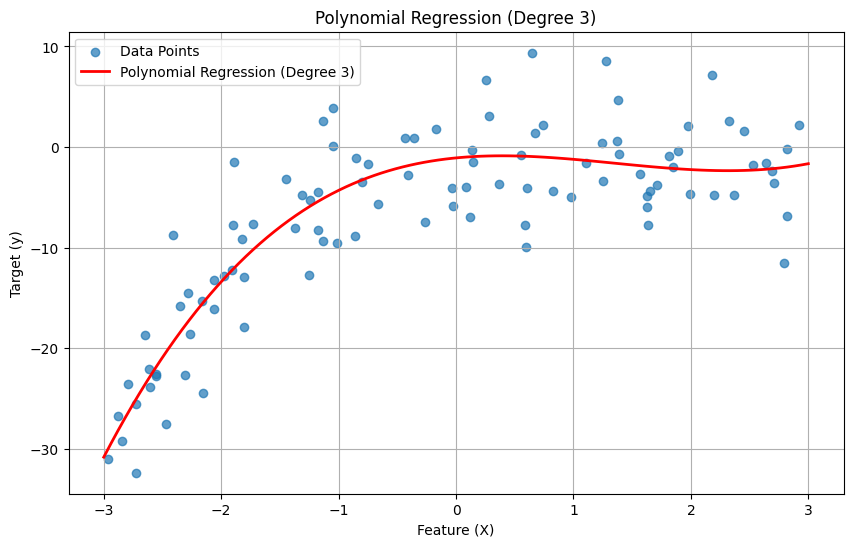

In [19]:
#17
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def perform_polynomial_regression_degree3(num_samples=100):

    np.random.seed(42)
    X = 6 * np.random.rand(num_samples, 1) - 3 
    y = 0.5 * X**3 - 2 * X**2 + X + np.random.randn(num_samples, 1) * 5
    model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
    model.fit(X, y)
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_predict = model.predict(X_plot)
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    plt.plot(X_plot, y_predict, "r-", linewidth=2, label="Polynomial Regression (Degree 3)")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Polynomial Regression (Degree 3)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    perform_polynomial_regression_degree3()

In [20]:
#18
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def multiple_linear_regression_5features(num_samples=100):
  
    np.random.seed(42) 
    X = np.random.rand(num_samples, 5) 
    y = 2 * X[:, 0] + 3 * X[:, 1] - 1.5 * X[:, 2] + 0.8 * X[:, 3] + 4 * X[:, 4] + np.random.randn(num_samples) * 0.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

if __name__ == "__main__":
    multiple_linear_regression_5features()

R-squared: 1.0000
Coefficients: [ 2.   3.  -1.5  0.8  4. ]
Intercept: 2.6645352591003757e-15


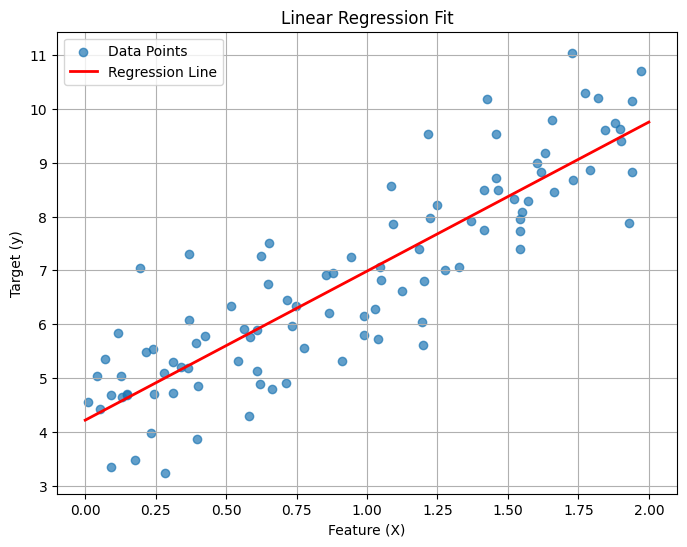

Coefficient (slope): 2.7701
Intercept: 4.2151


In [21]:
#19
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_fit_visualize_linear_regression(num_samples=100):

    np.random.seed(42)
    X = 2 * np.random.rand(num_samples, 1) 
    y = 4 + 3 * X + np.random.randn(num_samples, 1) 
    model = LinearRegression()
    model.fit(X, y)
    X_plot = np.array([[0], [2]]) 
    y_predict = model.predict(X_plot)
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label="Data Points")
    plt.plot(X_plot, y_predict, "r-", linewidth=2, label="Regression Line")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
    print(f"Intercept: {model.intercept_[0]:.4f}")

if __name__ == "__main__":
    generate_fit_visualize_linear_regression()

In [23]:
#20
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def multiple_linear_regression_3features(num_samples=100):
    np.random.seed(42) 
    X = np.random.rand(num_samples, 3) 
    y = 2 * X[:, 0] + 3 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(num_samples) * 0.5 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
if __name__ == "__main__":
    multiple_linear_regression_3features()

R-squared: 0.7160
Coefficients: [ 2.05294884  2.962303   -1.15697038]
Intercept: -0.04250522081646024


In [24]:
#21
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import joblib  # Import joblib

def demonstrate_joblib_serialization():

    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
    model = LinearRegression()
    model.fit(X, y)
    filename = "linear_regression_model.joblib"
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")
    loaded_model = joblib.load(filename)
    print("Model loaded successfully.")
    new_data = np.array([[2.0]])
    prediction = loaded_model.predict(new_data)
    print(f"Prediction for {new_data}: {prediction[0]:.4f}")

if __name__ == "__main__":
    demonstrate_joblib_serialization()

Model saved to linear_regression_model.joblib
Model loaded successfully.
Prediction for [[2.]]: 90.0395


In [25]:
#22
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def linear_regression_with_categorical_tips():

    tips = sns.load_dataset('tips')
    tips = pd.get_dummies(tips, drop_first=True)
    features = [col for col in tips.columns if col != 'tip']
    target = 'tip'

    X = tips[features]
    y = tips[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

if __name__ == "__main__":
    linear_regression_with_categorical_tips()

R-squared: 0.4373
Coefficients: [ 0.09469974  0.23348393 -0.02881928  0.19235325  0.17972098 -0.00606432
  0.12892759 -0.09495716]
Intercept: 0.47911791044079255


In [26]:
#23
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

def compare_linear_ridge_regression(num_samples=100):

    np.random.seed(42)
    X = np.random.rand(num_samples, 3)
    X[:, 1] = X[:, 0] + 0.1 * np.random.randn(num_samples) 
    y = 2 * X[:, 0] + 3 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(num_samples) * 0.5
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_predictions = linear_model.predict(X_test)
    linear_r2 = r2_score(y_test, linear_predictions)

    print("Linear Regression:")
    print(f"  R-squared: {linear_r2:.4f}")
    print(f"  Coefficients: {linear_model.coef_}")
    print(f"  Intercept: {linear_model.intercept_}")
    print("-" * 20)
    ridge_model = Ridge(alpha=1.0) 
    ridge_model.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_test)
    ridge_r2 = r2_score(y_test, ridge_predictions)

    print("Ridge Regression:")
    print(f"  R-squared: {ridge_r2:.4f}")
    print(f"  Coefficients: {ridge_model.coef_}")
    print(f"  Intercept: {ridge_model.intercept_}")

if __name__ == "__main__":
    compare_linear_ridge_regression()

Linear Regression:
  R-squared: 0.9509
  Coefficients: [ 2.06371503  3.27459416 -1.19214086]
  Intercept: -0.2805079911761479
--------------------
Ridge Regression:
  R-squared: 0.9560
  Coefficients: [ 2.34446827  2.6484537  -1.03284211]
  Intercept: -0.1799946959435501


In [27]:
#24
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

def evaluate_linear_regression_cross_validation(num_samples=100, num_features=1, noise=10, cv_folds=5):

    X, y = make_regression(n_samples=num_samples, n_features=num_features, noise=noise, random_state=42)
    model = LinearRegression()
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print("R-squared scores for each fold:", scores)
    print(f"Mean R-squared: {np.mean(scores):.4f}")
    print(f"Standard deviation of R-squared: {np.std(scores):.4f}")

if __name__ == "__main__":
    evaluate_linear_regression_cross_validation()

R-squared scores for each fold: [0.93741516 0.97012262 0.97072733 0.9325986  0.90936232]
Mean R-squared: 0.9440
Standard deviation of R-squared: 0.0235


In [28]:
#25
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def compare_polynomial_regression_degrees(num_samples=100, degrees=[1, 2, 3, 4, 5]):
   
    np.random.seed(42)
    X = 6 * np.random.rand(num_samples, 1) - 3
    y = 0.5 * X**3 - 2 * X**2 + X + np.random.randn(num_samples, 1) * 5
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = {}

    for degree in degrees:

        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train)

    
        y_pred = model.predict(X_test)

    
        r2 = r2_score(y_test, y_pred)
        results[degree] = r2

        print(f"Degree {degree}: R-squared = {r2:.4f}")

    return results

if __name__ == "__main__":
    compare_polynomial_regression_degrees()

Degree 1: R-squared = 0.5030
Degree 2: R-squared = 0.7727
Degree 3: R-squared = 0.8131
Degree 4: R-squared = 0.7994
Degree 5: R-squared = 0.8003
